# Europe LGBT Survey Analysis

## Probstok 4 - Hanvey Xavero 1806200135

## Tugas Uas 17 Desember 2019

<center><img src="lgbt-antara.png",width=700,height=700><left>
    
<br>
image source : www.instagram.com//webcomic_777
<br>
**Data from**: http://data.europa.eu/euodp/en/data/dataset/survey-eu-lesbian-gay-bisexual-transgender

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
dailylife=pd.read_csv('LGBT_Survey_DailyLife.csv')
discrimination=pd.read_csv('LGBT_Survey_Discrimination.csv')
ham=pd.read_csv('LGBT_Survey_RightsAwareness.csv')
spesifik=pd.read_csv('LGBT_Survey_TransgenderSpecificQuestions.csv')
Kekerasan=pd.read_csv('LGBT_Survey_ViolenceAndHarassment.csv')
subset1=pd.read_csv('LGBT_Survey_SubsetSize1.csv')
subset=pd.read_csv('LGBT_Survey_SubsetSize.csv', header=0, encoding = 'unicode_escape')

In [4]:
print(subset.head())

  CountryID      N  Lesbian women  Gay men  Bisexual women  Bisexual men  \
0  EU Total  93079          15236    57448            6424          7200   
1        AT   2543            437     1558             164           217   
2        BE   2901            424     1998             132           182   
3        BG   1033            226      474             139            88   
4        CY    265             41      164              18            17   

   Transgender      nama   latitude  longitude   baru   income  
0         6771       NaN          0   0.000000  93079      NaN  
1          167   austria  47.516232  14.550072   2543  45466.0  
2          165   belgium     50.503   4.469936   2901  41647.0  
3          106  bulgaria  42.733883  25.485830   1033  17107.0  
4           25    cyprus  35.126411  33.429859    265  31962.0  


In [5]:
print(subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
CountryID         29 non-null object
N                 29 non-null int64
Lesbian women     29 non-null int64
Gay men           29 non-null int64
Bisexual women    29 non-null int64
Bisexual men      29 non-null int64
Transgender       29 non-null int64
nama              28 non-null object
latitude          29 non-null object
longitude         29 non-null float64
baru              29 non-null int64
income            28 non-null float64
dtypes: float64(2), int64(7), object(3)
memory usage: 2.8+ KB
None


<Figure size 432x288 with 0 Axes>

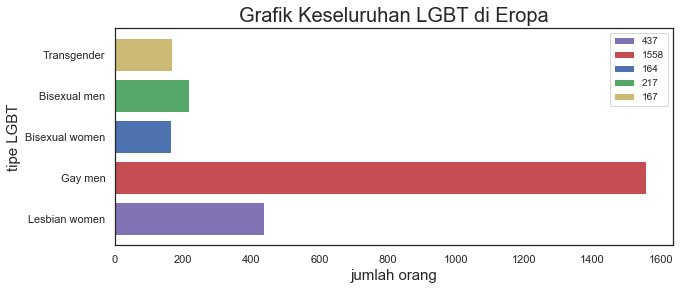

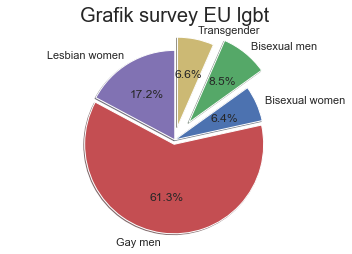

In [24]:
label = subset1.columns
label = label[2:]
value = subset1.iloc[1]
value = value[2:]

fig=plt.figure()
#plt.style.use('dark_background')
plt.figure(figsize=(10,4))
b = plt.barh(label, value, color = ("m", "r", "b", "g","y"))
plt.ylabel('tipe LGBT', fontsize =15)
plt.xlabel('jumlah orang', fontsize =15)
plt.title('Grafik Keseluruhan LGBT di Eropa', fontsize =20)
plt.legend(b, value, fontsize =10)
plt.show()

explode = (0, 0.1, 0, 0.5,0.3)
fig1, ax1 = plt.subplots()
a = ax1.pie(value, explode=explode, labels=label, autopct='%1.1f%%', radius=2,
        shadow=True, startangle=90, colors = ("m", "r", "b", "g","y"))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Grafik survey EU lgbt', fontsize =20)
plt.show()

<Figure size 432x288 with 0 Axes>

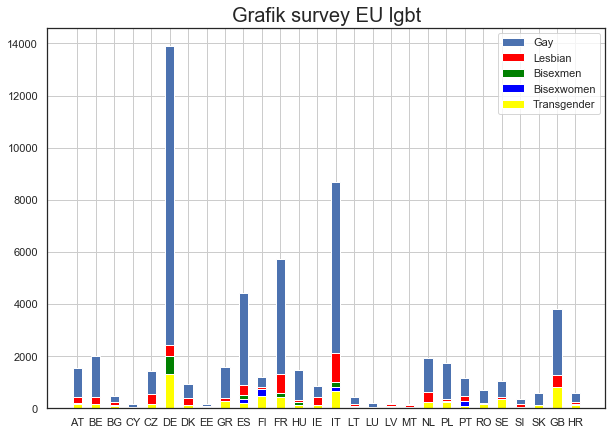

In [25]:
country=subset['CountryID'][1:]
gay=subset['Gay men'][1:]
lesbian=subset['Lesbian women'][1:]
bisexmen=subset['Bisexual men'][1:]
bisexwomen=subset['Bisexual women'][1:]
transgender=subset['Transgender'][1:]
width=0.5,
fig=plt.figure()
plt.figure(figsize=(10,7))
plt.title('Grafik survey EU lgbt', fontsize =20)
p1 = plt.bar(country,gay,width, )
p2 = plt.bar(country,lesbian,width,color=("red"))
p3 = plt.bar(country,bisexmen,width,color=("green"))
p4 = plt.bar(country,bisexwomen,width,color=("blue"))
p5 = plt.bar(country,transgender,width,color=("yellow"))
plt.legend((p1[0], p2[0],p3[0],p4[4],p5[0]), ('Gay', 'Lesbian', 'Bisexmen', 'Bisexwomen', 'Transgender'))
plt.grid(True)
plt.show()



In [8]:
placeslat=subset['latitude'][1:]
placeslong=subset['longitude'][1:]
jumlah=subset['baru'][1:]
nama=subset['nama'][1:]
income=subset['income'][1:]

In [9]:
!pip install ipyleaflet

In [10]:
!jupyter nbextension enable --py --sys-prefix ipyleaflet # mengecek apakah installation ipyleaflet berhasil

Please specify one nbextension/package at a time


In [11]:
from ipyleaflet import (Map, DrawControl, Circle) 
from ipywidgets import HTML
myMap=Map(center=[55.676098, 12.568337],zoom=4)
dc=DrawControl(Circle={'shapeOptions':{'color':'#0000FF'}})
myMap.add_control(dc)
for i in range (1,28):
    circle = Circle()
    circle.radius = int(jumlah[i])*15
    circle.location = (placeslat[i], placeslong[i])  
    circle.color = "blue"
    circle.fill_color = "blue"
    myMap.add_layer(circle)

print("Peta persebaran LGBT di Eropa\n")
myMap

Peta persebaran LGBT di Eropa



Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [12]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, Circle, Popup
from ipywidgets import HTML

center=(53,12)
watercolor = basemap_to_tiles(basemaps.Stamen.Watercolor)

m = Map(layers=(watercolor, ), center=center, zoom=4, close_popup_on_click=False)

for i in range (1,29):
    circle = Circle()
    circle.radius = int(jumlah[i])*10
    circle.location = (placeslat[i], placeslong[i])  
    circle.color = "red"
    circle.fill_color = "red"
    m.add_layer(circle)
    a = nama[i],jumlah[i]
    message = HTML()
    message.value=str(a)
    popup = Popup(
        location=(placeslat[i], placeslong[i]),
        child=message,
        close_button=False,
        auto_close=False,
        close_on_escape_key=False
    )
    m.add_layer(popup)


m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [13]:
data=pd.read_csv("LGBT_Survey_SubsetSize2.csv") 
  
#sorting data
data.sort_values(["income","jumlah total" ], axis=0, 
                 ascending=[False,True], 
inplace=True) 
  
#display
data=data.drop([0], axis=0)
data 

,CountryID,Lesbian women,Gay men,Bisexual women,Bisexual men,Transgender,jumlah total,income
17,LU,51,187,16,26,38,318,92102
20,NL,614,1937,214,159,251,3175,46491
14,IE,423,864,141,58,139,1625,46058
1,AT,437,1558,164,217,167,2543,45466
6,DE,2445,13907,590,2000,1329,20271,44266
24,SE,427,1053,341,269,374,2464,44057
7,DK,393,930,136,108,143,1710,43933
2,BE,424,1998,132,182,165,2901,41647
11,FI,820,1192,756,190,481,3439,40340
12,FR,1302,5720,326,592,435,8375,39251


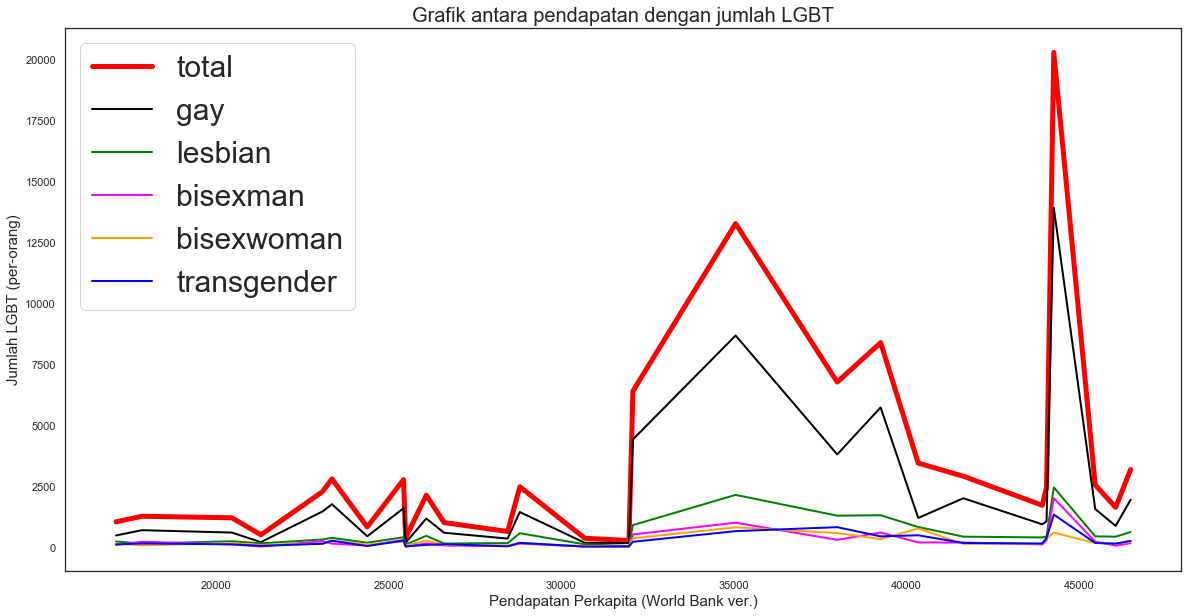

In [30]:
pendapatan=data['income'][1:]
total=data['jumlah total'][1:]
ga=data['Gay men'][1:]
lesbia=data['Lesbian women'][1:]
bisexme=data['Bisexual men'][1:]
bisexwome=data['Bisexual women'][1:]
transgende=data['Transgender'][1:]

plt.figure(figsize=(20,10))
#plt.style.use('dark_background')
plt.title('Grafik antara pendapatan dengan jumlah LGBT', fontsize =20)
plt.ylabel('Jumlah LGBT (per-orang)', fontsize =15)
plt.xlabel('Pendapatan Perkapita (World Bank ver.)', fontsize =15)
plt.plot(pendapatan,total,color="red", label="total", linewidth=5)
plt.plot(pendapatan,ga,color="black", label="gay",linewidth=2)
plt.plot(pendapatan,lesbia,color="green", label="lesbian",linewidth=2)
plt.plot(pendapatan,bisexme,color="magenta", label="bisexman",linewidth=2)
plt.plot(pendapatan,bisexwome,color="orange", label="bisexwoman",linewidth=2)
plt.plot(pendapatan,transgende,color="blue", label="transgender",linewidth=2)
plt.legend(fontsize = 30)

In [15]:
print("Menentukan kota mana yang pemerintahannya mendukung dan/atau menolak LGBT")

# Classifying all of the answers in to 3 classes, Widespread, rare and Dont know
Widespread=['Strongly agree', 'Agree','Most', 'All', '6 times or more in the last six months','Always open','Fairly open',
       'Very open','Very widespread', 'Fairly widespread','6','7','8','9','10','Yes' ]

Rare=['Fairly rare', 'Very rare','Disagree','Strongly disagree', 'No','None', 'A few','Never happened in the last sixth months',
       'Happened only once in the last six months','2-5 times in the last six months','selectively open','Never Open', 'Rarely Open','0','1','2','3','4']

dont_know=['Don`t know','I do not have a partner (Does not apply to me)','Single',
       'Married/in a registered partnership', 'Divorced', 'Separated',
       'Widowed', 'Living together with a partner /spouse',
       'Involved in a relationship without living together',
       'Have no relationship / do not have a partner',
       'I did not need or use any benefits or services',
       'An ethnic minority (including of migrant background)',
       'A sexual minority',
       'A minority in terms of disability (excluding diagnosis of gender dysphoria/gender identity disorder)',
       'A religious minority', 'Other minority group',
       'None of the above',
       'I read about it in a newspaper (online or printed)',
       'I received an email from an organisation or online network',
       'Somebody told me about it or sent me the link',
       'Through social media (facebook, twitter or etc.)',
       'I saw an advertisement (banner) online, please specify where:',
       'Somewhere else', 'hide LGBT identity','5','Current situation is fine']

Q1=dailylife.loc[dailylife['question_code']=='b1_a'].copy()
Q1['answer_1']=''
# analisa respon
for ix,val in enumerate(Q1.answer):
    if Q1['answer'].iloc[ix] in Widespread :
        Q1['answer_1'].iloc[ix]='Widespread'
    if Q1['answer'].iloc[ix] in Rare :
        Q1['answer_1'].iloc[ix]='Rare'
    if Q1['answer'].iloc[ix] in dont_know :
        Q1['answer_1'].iloc[ix]="Don`t know"

Menentukan kota mana yang pemerintahannya mendukung dan/atau menolak LGBT


In [16]:
Q1=Q1.replace(':','0')
Q1=Q1[['CountryCode','answer_1','subset','percentage']]
Q1['percentage']=Q1['percentage'].astype(str).astype(int)

B1_a_rare=Q1.loc[Q1['answer_1']=='Rare']
B1_a_rare=B1_a_rare.groupby(['CountryCode','answer_1','subset'])['percentage'].sum()
B1_a_rare=B1_a_rare.reset_index()
B1_a_rare=B1_a_rare.sort_values('percentage',ascending=False).head(30)
print('Negara dengan skala penolakan LGBT terbesar oleh pemerintah setempat')
print('\t')
print(B1_a_rare)
print('\t')
B1_a_rare=Q1.loc[Q1['answer_1']=='Widespread']
B1_a_rare=B1_a_rare.groupby(['CountryCode','answer_1','subset'])['percentage'].sum()
B1_a_rare=B1_a_rare.reset_index()
B1_a_rare=B1_a_rare.sort_values('percentage',ascending=False).head(30)
print('Negara dengan skala penolakan LGBT terbesar oleh pemerintah setempat')
print('\t')
print(B1_a_rare)

Negara dengan skala penolakan LGBT terbesar oleh pemerintah setempat
	
        CountryCode answer_1          subset  percentage
37          Denmark     Rare             Gay          91
92       Luxembourg     Rare             Gay          91
57          Germany     Rare             Gay          89
102     Netherlands     Rare             Gay          89
38          Denmark     Rare         Lesbian          88
100     Netherlands     Rare    Bisexual men          88
12          Belgium     Rare             Gay          88
35          Denmark     Rare    Bisexual men          87
55          Germany     Rare    Bisexual men          85
10          Belgium     Rare    Bisexual men          85
11          Belgium     Rare  Bisexual women          84
58          Germany     Rare         Lesbian          84
103     Netherlands     Rare         Lesbian          84
101     Netherlands     Rare  Bisexual women          83
36          Denmark     Rare  Bisexual women          83
137          Swed

In [17]:

B1_a_den=Q1.loc[Q1['CountryCode']=="Luxembourg"]
B1_a_den=B1_a_den.groupby(['CountryCode','answer_1','subset'])['percentage'].sum()
B1_a_den=B1_a_den.reset_index()
B1_a_den=B1_a_den.sort_values('percentage',ascending=False)

print('This is what LGBT from Luxembourg says about their politicans')
print('\t')
print(B1_a_den)

This is what LGBT from Luxembourg says about their politicans
	
   CountryCode    answer_1          subset  percentage
7   Luxembourg        Rare             Gay          91
5   Luxembourg        Rare    Bisexual men          80
8   Luxembourg        Rare         Lesbian          67
9   Luxembourg        Rare     Transgender          58
14  Luxembourg  Widespread     Transgender          29
13  Luxembourg  Widespread         Lesbian          20
10  Luxembourg  Widespread    Bisexual men          16
3   Luxembourg  Don`t know         Lesbian          14
4   Luxembourg  Don`t know     Transgender          13
12  Luxembourg  Widespread             Gay           5
0   Luxembourg  Don`t know    Bisexual men           4
2   Luxembourg  Don`t know             Gay           4
1   Luxembourg  Don`t know  Bisexual women           0
6   Luxembourg        Rare  Bisexual women           0
11  Luxembourg  Widespread  Bisexual women           0


## Negara EU yang cenderung mendukung LGBT didominasi oleh:
1. Denmark
2. Germany
3. Netherlands

## Negara EU yang cenderung menolak LGBT didominasi oleh:
1. Italy
2. Lithuania
3. Poland


# Mencari konstanta korelasi antara pendapatan perkapita dengan LGBT<br>
## Correlational Methods
Correlational Methods are a form of research that include “quasi-experimental” designs such as survey research or naturalistic<br> observations, in which different groups are compared, but cause and effect between variables cannot be <br>determined. These are different from True Experimental Designs because there is no control condition, nothing is manipulated, and there are many <br>differences between the groups other than the independent variable(s).<br>

However, correlational studies are often easier to conduct than experiments and can be used when conducting a controlled <br>experiment is impossible. For example, if we wanted to examine the relationship between grade point average and number of <br>alcoholic drinks per week, we cannot ethically assign participants to binge-drinking conditions. We can only observe drinking <br>behavior in a real-world setting or rely on participants’ self-report.<br>
<center>dengan 3 metode :</center><br><br>
pearson : standard correlation coefficient<br>
kendall : Kendall Tau correlation coefficient<br>
spearman : Spearman rank correlation

In [18]:
korelasi = pd.read_csv('LGBT_Survey_SubsetSize1.csv')
korelasi = korelasi.drop(columns="CountryID")
corr = korelasi.corr(method='pearson')
corr1 = korelasi.corr(method='kendall')
corr2 = korelasi.corr(method='spearman')
korelasix = pd.read_csv('LGBT_Survey_SubsetSize2.csv')
korelasix = korelasix.drop(columns="CountryID")
corrx = korelasix.corr(method='pearson')
corr1x = korelasix.corr(method='kendall')
corr2x = korelasix.corr(method='spearman')

In [19]:
corrx

,Lesbian women,Gay men,Bisexual women,Bisexual men,Transgender,jumlah total,income
Lesbian women,1.000000,0.995098,0.993666,0.990433,0.995780,0.997751,0.977291
Gay men,0.995098,1.000000,0.979872,0.998068,0.991794,0.999376,0.961078
Bisexual women,0.993666,0.979872,1.000000,0.974590,0.990983,0.986100,0.981900
Bisexual men,0.990433,0.998068,0.974590,1.000000,0.989695,0.997060,0.955982
Transgender,0.995780,0.991794,0.990983,0.989695,1.000000,0.995077,0.973857
jumlah total,0.997751,0.999376,0.986100,0.997060,0.995077,1.000000,0.967838
income,0.977291,0.961078,0.981900,0.955982,0.973857,0.967838,1.000000


Method (from left to right: )
1.spearman 2.kendall 3.pearson 


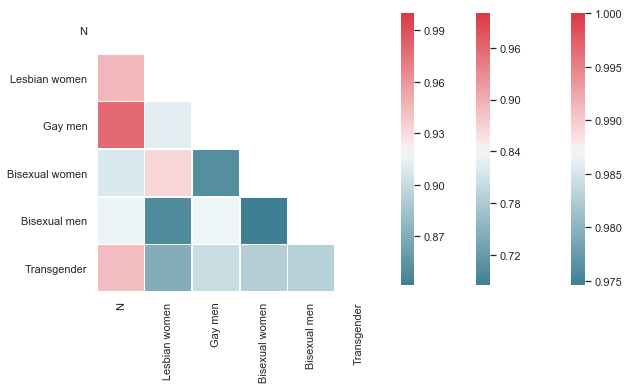

In [31]:
import seaborn as sns
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
sns.set(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr1, vmax=.3, center=0,
 #           square=True, linewidths=.5, cbar_kws={"shrink": .5})
print("Method (from left to right: )")
print("1.spearman 2.kendall 3.pearson ")
sns.heatmap(corr, cbar_kws={"shrink": .5}, linewidths=.5, mask=mask, cmap=cmap, square=True)
sns.heatmap(corr1, cbar_kws={"shrink": .5}, linewidths=.5, mask=mask, cmap=cmap, square=True)
sns.heatmap(corr2, cbar_kws={"shrink": .5}, linewidths=.5, mask=mask, cmap=cmap, square=True)

Method (from left to right: )
1.spearman 2.kendall 3.pearson 


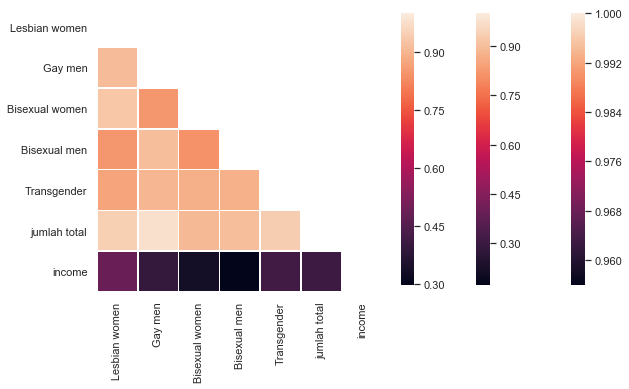

In [23]:
mask = np.zeros_like(corrx, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(10,10))
# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr1, vmax=.3, center=0,
 #           square=True, linewidths=.5, cbar_kws={"shrink": .5})
print("Method (from left to right: )")
print("1.spearman 2.kendall 3.pearson ")
sns.heatmap(corrx, cbar_kws={"shrink": .5}, linewidths=.5, mask=mask,  square=True)
sns.heatmap(corr1x, cbar_kws={"shrink": .5}, linewidths=.5, mask=mask, square=True)
sns.heatmap(corr2x, cbar_kws={"shrink": .5}, linewidths=.5, mask=mask, square=True)

## korelasi antara jumlah LGBT dengan pendapatan perkapita berbanding lurus, tetapi sangat kecil (0.2-0.45)

In [22]:
from sklearn.decomposition import PCA

component_var = {}
for i in range(2, 6):
    pca = PCA(n_components=i)
    res = pca.fit(korelasi)
#     print('At components: ', i)
#     display(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))
    component_var[i] = sum(pca.explained_variance_ratio_)
print(component_var)

{2: 0.9999462058155775, 3: 0.9999826538764229, 4: 0.9999952471093726, 5: 1.0}
